In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns

In [2]:
path = 'cab_rides.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [5]:
df['date_time'] = pd.to_datetime(df['time_stamp']/1000, unit = 's')

In [6]:
df = df.sort_values(by = 'date_time')

In [7]:
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time
30792,3.03,Lyft,1543203646318,Theatre District,Boston University,34.0,1.0,ef4771c2-c88d-4730-aaf7-a95751e9d27e,lyft_luxsuv,Lux Black XL,2018-11-26 03:40:46.318000078
446073,1.57,Uber,1543203646319,North End,Theatre District,NaN,1.0,9962f244-8fce-4ae9-a583-139d5d7522e1,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-11-26 03:40:46.319000006
65662,1.30,Uber,1543203646319,Theatre District,South Station,18.5,1.0,00ea74ea-2c49-416c-bfc5-f7877025f6eb,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-11-26 03:40:46.319000006
613927,2.71,Uber,1543203646320,Fenway,Theatre District,19.5,1.0,8682f9bf-5cc0-4dfc-b8fe-4e22070d1684,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-11-26 03:40:46.319999933
98705,2.43,Lyft,1543203646320,Beacon Hill,Northeastern University,10.5,1.0,edfc7f44-97e1-48cd-930c-e4fe20e88ac8,lyft,Lyft,2018-11-26 03:40:46.319999933


In [8]:
df['mile'] = df['price']/df['distance']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693071 entries, 30792 to 205382
Data columns (total 12 columns):
distance            693071 non-null float64
cab_type            693071 non-null object
time_stamp          693071 non-null int64
destination         693071 non-null object
source              693071 non-null object
price               637976 non-null float64
surge_multiplier    693071 non-null float64
id                  693071 non-null object
product_id          693071 non-null object
name                693071 non-null object
date_time           693071 non-null datetime64[ns]
mile                637976 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 68.7+ MB


In [10]:
df['date'] = [d.date() for d in df['date_time']]
df['time'] = [d.time() for d in df['date_time']]

df = df.drop(columns = 'date_time')

In [11]:
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,mile,date,time
30792,3.03,Lyft,1543203646318,Theatre District,Boston University,34.0,1.0,ef4771c2-c88d-4730-aaf7-a95751e9d27e,lyft_luxsuv,Lux Black XL,11.221122,2018-11-26,03:40:46.318000
446073,1.57,Uber,1543203646319,North End,Theatre District,NaN,1.0,9962f244-8fce-4ae9-a583-139d5d7522e1,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2018-11-26,03:40:46.319000
65662,1.30,Uber,1543203646319,Theatre District,South Station,18.5,1.0,00ea74ea-2c49-416c-bfc5-f7877025f6eb,6c84fd89-3f11-4782-9b50-97c468b19529,Black,14.230769,2018-11-26,03:40:46.319000
613927,2.71,Uber,1543203646320,Fenway,Theatre District,19.5,1.0,8682f9bf-5cc0-4dfc-b8fe-4e22070d1684,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,7.195572,2018-11-26,03:40:46.319999
98705,2.43,Lyft,1543203646320,Beacon Hill,Northeastern University,10.5,1.0,edfc7f44-97e1-48cd-930c-e4fe20e88ac8,lyft,Lyft,4.320988,2018-11-26,03:40:46.319999


In [12]:
df = df.reset_index(drop = True)

In [13]:
df1 = df[['date', 'time', 'id']]
df2 = df[['distance', 'cab_type', 'destination', 'source', 'price', 'surge_multiplier', 'name', 'mile', 'id']]
df = pd.merge(df1, df2, on = 'id' )

df = df.drop(columns = 'id')
df.head()

,date,time,distance,cab_type,destination,source,price,surge_multiplier,name,mile
0,2018-11-26,03:40:46.318000,3.03,Lyft,Theatre District,Boston University,34.0,1.0,Lux Black XL,11.221122
1,2018-11-26,03:40:46.319000,1.57,Uber,North End,Theatre District,NaN,1.0,Taxi,NaN
2,2018-11-26,03:40:46.319000,1.30,Uber,Theatre District,South Station,18.5,1.0,Black,14.230769
3,2018-11-26,03:40:46.319999,2.71,Uber,Fenway,Theatre District,19.5,1.0,UberX,7.195572
4,2018-11-26,03:40:46.319999,2.43,Lyft,Beacon Hill,Northeastern University,10.5,1.0,Lyft,4.320988


In [14]:
df.shape

(693071, 10)

In [15]:
df = df.dropna()

In [16]:
df.shape

(637976, 10)

In [17]:
df.describe()

,distance,price,surge_multiplier,mile
count,637976.000000,637976.000000,637976.000000,637976.000000
mean,2.189261,16.545125,1.015068,9.687674
std,1.135413,9.324359,0.095422,13.705589
min,0.020000,2.500000,1.000000,0.556586
25%,1.270000,9.000000,1.000000,4.661017
50%,2.160000,13.500000,1.000000,7.492326
75%,2.930000,22.500000,1.000000,11.538462
max,7.860000,97.500000,3.000000,1375.000000


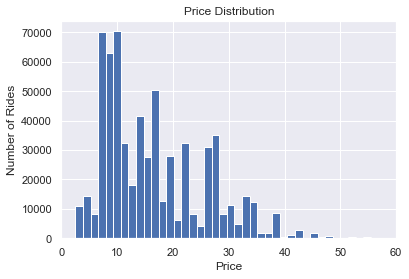

In [18]:

sns.set()
_ = plt.hist(df.price, bins = 70)
_ = plt.xlabel('Price')
_ = plt.ylabel('Number of Rides')
_ = plt.title('Price Distribution')
_ = plt.xlim((0, 60))

plt.show()

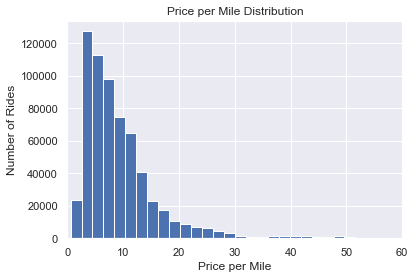

In [19]:
_ = plt.hist(df.mile, bins = 700)
_ = plt.xlabel('Price per Mile')
_ = plt.ylabel('Number of Rides')
_ = plt.title('Price per Mile Distribution')
_ = plt.xlim((0, 60))

plt.show()

/Users/azarnajafli/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


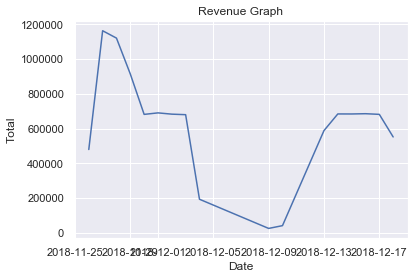

In [20]:
_ = plt.plot(df[['date', 'price']].groupby('date').sum())
_ = plt.xlabel('Date')
_ = plt.ylabel('Total')
_ = plt.title('Revenue Graph')

plt.show()

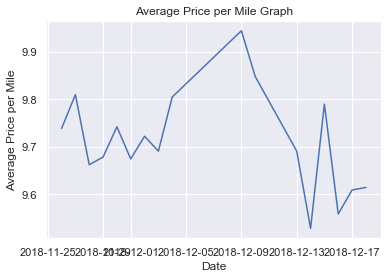

In [21]:
_ = plt.plot(df[['date', 'mile']].groupby('date').mean())
_ = plt.xlabel('Date')
_ = plt.ylabel('Average Price per Mile')
_ = plt.title('Average Price per Mile Graph')

plt.show()

In [22]:
df = df.drop_duplicates()

In [23]:
df.shape

(637905, 10)

In [24]:
df.head()

,date,time,distance,cab_type,destination,source,price,surge_multiplier,name,mile
0,2018-11-26,03:40:46.318000,3.03,Lyft,Theatre District,Boston University,34.0,1.0,Lux Black XL,11.221122
2,2018-11-26,03:40:46.319000,1.30,Uber,Theatre District,South Station,18.5,1.0,Black,14.230769
3,2018-11-26,03:40:46.319999,2.71,Uber,Fenway,Theatre District,19.5,1.0,UberX,7.195572
4,2018-11-26,03:40:46.319999,2.43,Lyft,Beacon Hill,Northeastern University,10.5,1.0,Lyft,4.320988
5,2018-11-26,03:40:46.319999,2.71,Uber,Fenway,Theatre District,32.0,1.0,UberXL,11.808118


In [25]:
df = df.reset_index()

In [26]:
df.head()

,index,date,time,distance,cab_type,destination,source,price,surge_multiplier,name,mile
0,0,2018-11-26,03:40:46.318000,3.03,Lyft,Theatre District,Boston University,34.0,1.0,Lux Black XL,11.221122
1,2,2018-11-26,03:40:46.319000,1.30,Uber,Theatre District,South Station,18.5,1.0,Black,14.230769
2,3,2018-11-26,03:40:46.319999,2.71,Uber,Fenway,Theatre District,19.5,1.0,UberX,7.195572
3,4,2018-11-26,03:40:46.319999,2.43,Lyft,Beacon Hill,Northeastern University,10.5,1.0,Lyft,4.320988
4,5,2018-11-26,03:40:46.319999,2.71,Uber,Fenway,Theatre District,32.0,1.0,UberXL,11.808118


In [27]:
df.drop(columns = 'index')

,date,time,distance,cab_type,destination,source,price,surge_multiplier,name,mile
0,2018-11-26,03:40:46.318000,3.03,Lyft,Theatre District,Boston University,34.0,1.0,Lux Black XL,11.221122
1,2018-11-26,03:40:46.319000,1.30,Uber,Theatre District,South Station,18.5,1.0,Black,14.230769
2,2018-11-26,03:40:46.319999,2.71,Uber,Fenway,Theatre District,19.5,1.0,UberX,7.195572
3,2018-11-26,03:40:46.319999,2.43,Lyft,Beacon Hill,Northeastern University,10.5,1.0,Lyft,4.320988
4,2018-11-26,03:40:46.319999,2.71,Uber,Fenway,Theatre District,32.0,1.0,UberXL,11.808118
...,...,...,...,...,...,...,...,...,...,...
637900,2018-12-18,19:15:10.943000,2.40,Lyft,Beacon Hill,Northeastern University,10.5,1.0,Lyft,4.375000
637901,2018-12-18,19:15:10.943000,2.48,Uber,South Station,Beacon Hill,14.0,1.0,UberXL,5.645161
637902,2018-12-18,19:15:10.943000,2.40,Lyft,Beacon Hill,Northeastern University,16.5,1.0,Lux,6.875000
637903,2018-12-18,19:15:10.943000,2.40,Lyft,Beacon Hill,Northeastern University,16.5,1.0,Lyft XL,6.875000


### UBER

In [28]:
uber = df[df['cab_type']=='Uber']

In [29]:
uber.head()

,index,date,time,distance,cab_type,destination,source,price,surge_multiplier,name,mile
1,2,2018-11-26,03:40:46.319000,1.30,Uber,Theatre District,South Station,18.5,1.0,Black,14.230769
2,3,2018-11-26,03:40:46.319999,2.71,Uber,Fenway,Theatre District,19.5,1.0,UberX,7.195572
4,5,2018-11-26,03:40:46.319999,2.71,Uber,Fenway,Theatre District,32.0,1.0,UberXL,11.808118
5,7,2018-11-26,03:40:46.358000,2.19,Uber,North End,Beacon Hill,8.0,1.0,UberX,3.652968
6,8,2018-11-26,03:40:46.358000,3.05,Uber,Fenway,North Station,10.5,1.0,WAV,3.442623


In [30]:
uber.name.value_counts()

Black SUV    55088
UberX        55088
UberXL       55086
WAV          55086
Black        55085
UberPool     55085
Name: name, dtype: int64

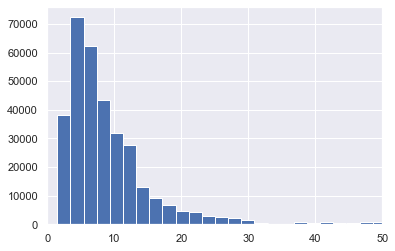

In [31]:
_ = plt.hist(uber['mile'], bins = 700)
_ = plt.xlim((0, 50))

In [32]:
uber = uber.reset_index(drop = True)

In [33]:
uberxl = uber[uber['name'] == 'UberXL']
uberbls = uber[uber['name'] == 'Black SUV']
uberbl = uber[uber['name'] == 'Black']
uberw = uber[uber['name'] == 'WAV']
uberx = uber[uber['name'] == 'UberX']
uberpool = uber[uber['name'] == 'UberPool']

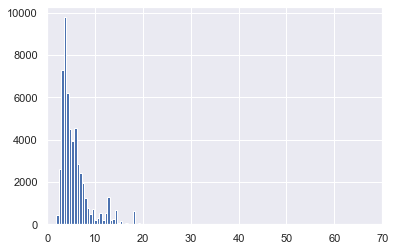

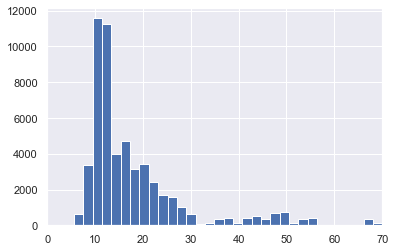

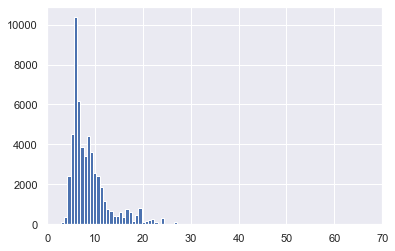

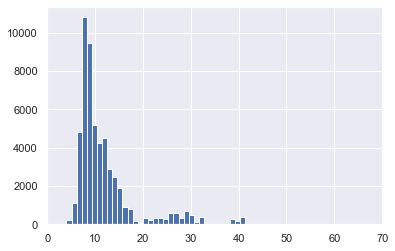

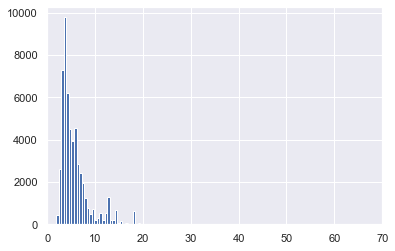

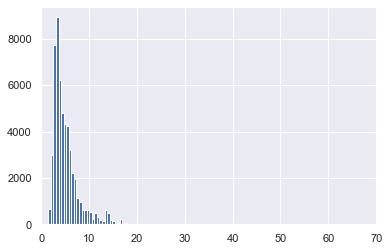

In [34]:
series = [uberw['mile'], uberbls['mile'], uberxl['mile'], uberbl['mile'], uberx['mile'], uberpool['mile']]
titles = ['WAV', 'Black SUV', 'XL', 'Black', 'X', 'Pool']

for i in series:
    graphs = plt.hist(i, bins = 700)
    plt.xlim((0, 70))
    plt.show()


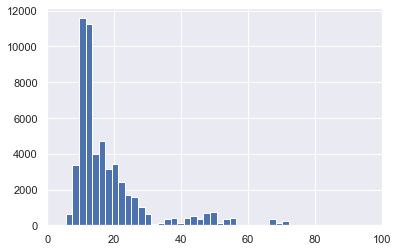

In [35]:
_ = plt.hist(uberbls['mile'], bins = 700)
_ = plt.xlim((0, 100))
plt.show()

In [36]:
uber = uber.drop(uber[uber['mile']>30].index)

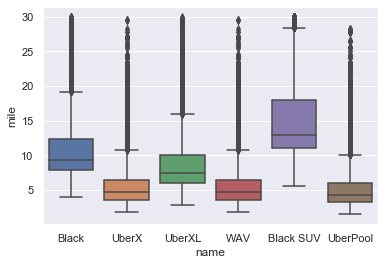

In [37]:
_ = sns.boxplot(uber['name'], uber['mile'])

In [38]:
uberxl = uber[uber['name'] == 'UberXL']
uberbls = uber[uber['name'] == 'Black SUV']
uberbl = uber[uber['name'] == 'Black']
uberw = uber[uber['name'] == 'WAV']
uberx = uber[uber['name'] == 'UberX']
uberpool = uber[uber['name'] == 'UberPool']

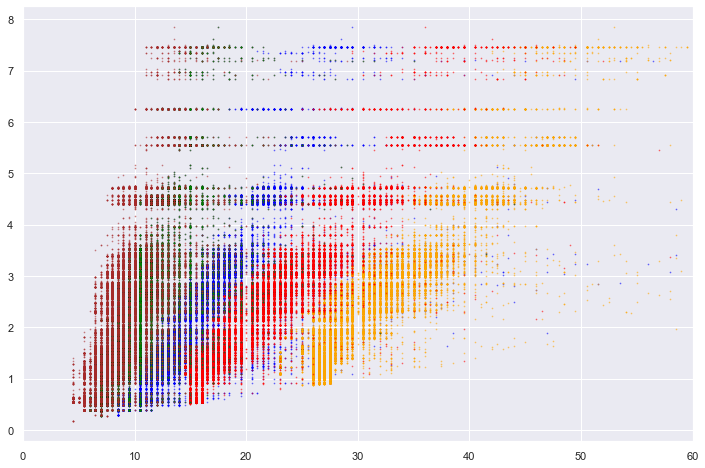

In [39]:
_ = plt.figure(figsize = (12, 8))
_ = plt.scatter(uberxl['price'], uberxl['distance'],  color = "blue", s = 0.5, alpha = 0.5)
_ = plt.scatter(uberbls['price'], uberbls['distance'], color = "orange", s = 0.5, alpha = 0.5)
_ = plt.scatter(uberbl['price'], uberbl['distance'], color = "red", s = 0.5, alpha = 0.5)
_ = plt.scatter(uberw['price'], uberw['distance'],  color = "purple", s = 0.5, alpha = 0.5)
_ = plt.scatter(uberx['price'], uberx['distance'], color = "green", s = 0.5, alpha = 0.5)
_ = plt.scatter(uberpool['price'], uberpool['distance'], color = "brown", s = 0.5, alpha = 0.5)
_ = plt.xlabel('')
_ = plt.xlim((0, 60))
_ = plt.show()

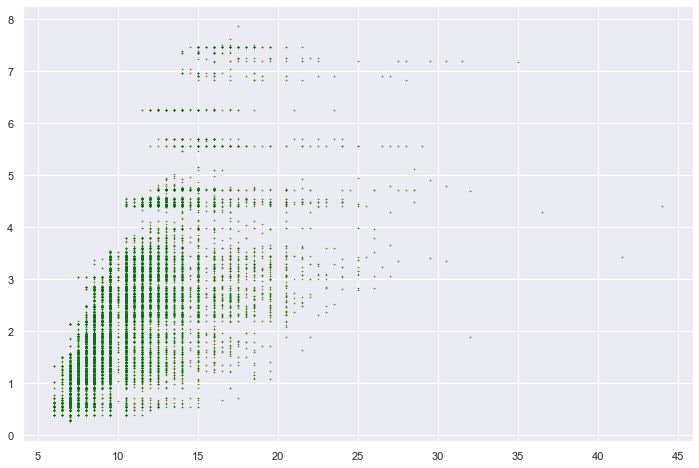

In [40]:
_ = plt.figure(figsize = (12, 8))

_ = plt.scatter(uberw['price'], uberw['distance'], s = 0.1, color = 'red')
_ = plt.scatter(uberx['price'], uberx['distance'], s = 0.1, color = 'green')

plt.show()

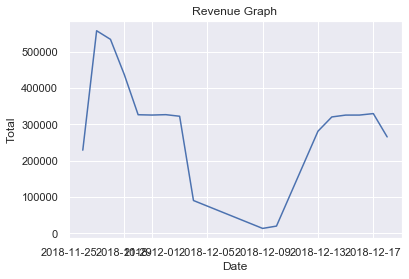

In [41]:
sns.set()

_ = plt.plot(uber[['date', 'price']].groupby('date').sum())
_ = plt.xlabel('Date')
_ = plt.ylabel('Total')
_ = plt.title('Revenue Graph')

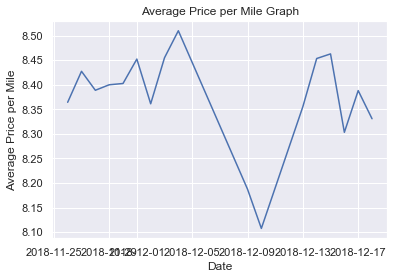

In [42]:
sns.set()

_ = plt.plot(uber[['date', 'mile']].groupby('date').mean())
_ = plt.xlabel('Date')
_ = plt.ylabel('Average Price per Mile')
_ = plt.title('Average Price per Mile Graph')

### LYFT

In [43]:
lyft = df[df['cab_type'] == 'Lyft']

In [44]:
lyft.head()

,index,date,time,distance,cab_type,destination,source,price,surge_multiplier,name,mile
0,0,2018-11-26,03:40:46.318000,3.03,Lyft,Theatre District,Boston University,34.0,1.00,Lux Black XL,11.221122
3,4,2018-11-26,03:40:46.319999,2.43,Lyft,Beacon Hill,Northeastern University,10.5,1.00,Lyft,4.320988
9,11,2018-11-26,03:40:46.358999,2.22,Lyft,Northeastern University,Theatre District,7.0,1.00,Shared,3.153153
10,12,2018-11-26,03:40:46.358999,4.46,Lyft,Financial District,Boston University,47.5,1.75,Lux,10.650224
11,13,2018-11-26,03:40:46.358999,4.46,Lyft,Financial District,Boston University,62.5,1.75,Lux Black,14.013453


In [45]:
lyft = lyft.reset_index(drop = True)

In [46]:
lyft.name.value_counts()

Shared          51233
Lux             51232
Lux Black       51231
Lyft XL         51231
Lux Black XL    51231
Lyft            51229
Name: name, dtype: int64

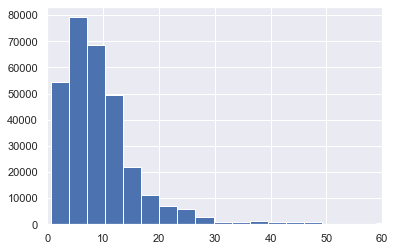

In [47]:
_ = plt.hist(lyft['mile'], bins = 35)
_ = plt.xlim((0, 60))

In [48]:
lyft = lyft.reset_index(drop = True)

In [49]:
lyft = lyft.drop(columns = 'index')

In [50]:
lyft.head()

,date,time,distance,cab_type,destination,source,price,surge_multiplier,name,mile
0,2018-11-26,03:40:46.318000,3.03,Lyft,Theatre District,Boston University,34.0,1.00,Lux Black XL,11.221122
1,2018-11-26,03:40:46.319999,2.43,Lyft,Beacon Hill,Northeastern University,10.5,1.00,Lyft,4.320988
2,2018-11-26,03:40:46.358999,2.22,Lyft,Northeastern University,Theatre District,7.0,1.00,Shared,3.153153
3,2018-11-26,03:40:46.358999,4.46,Lyft,Financial District,Boston University,47.5,1.75,Lux,10.650224
4,2018-11-26,03:40:46.358999,4.46,Lyft,Financial District,Boston University,62.5,1.75,Lux Black,14.013453


In [51]:
lyftsh = lyft[lyft['name'] == 'Shared']
lyftl = lyft[lyft['name'] == 'Lux']
lyftxl = lyft[lyft['name'] == 'Lyft XL']
lyftbxl = lyft[lyft['name'] == 'Lux Black XL']
lyftb = lyft[lyft['name'] == 'Lux Black']
lyftr = lyft[lyft['name'] == 'Lyft']

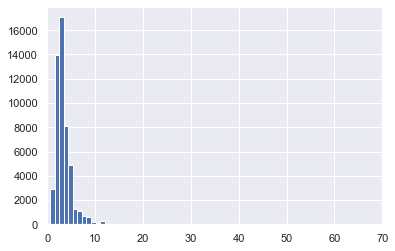

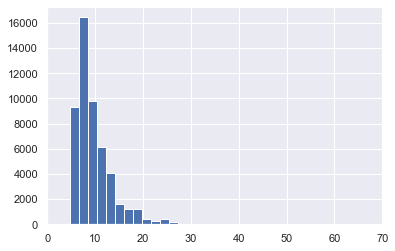

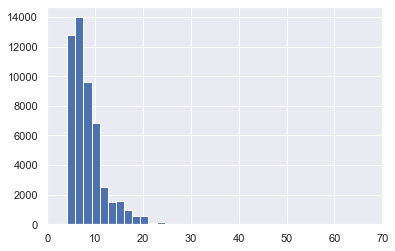

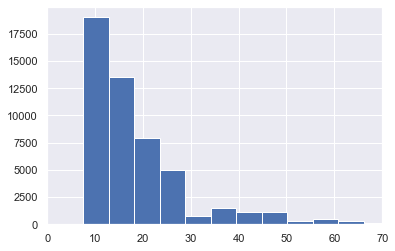

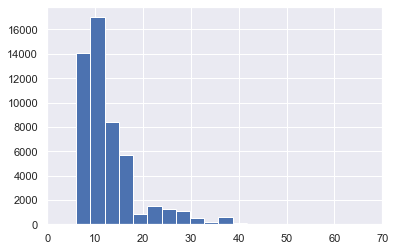

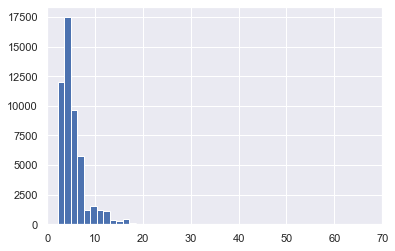

In [52]:
series = [lyftsh['mile'], lyftl['mile'], lyftxl['mile'], lyftbxl['mile'], lyftb['mile'], lyftr['mile']]

for i in series:
    graphs = plt.hist(i, bins = 20)
    plt.xlim((0, 70))
    plt.show()

In [53]:
lyft = lyft.drop(lyft[lyft['mile']>50].index)

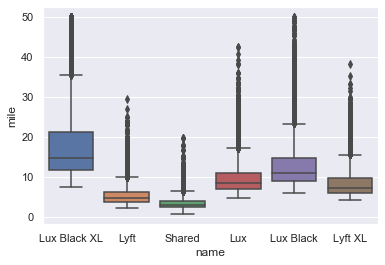

In [54]:
_ = sns.boxplot(lyft['name'], lyft['mile'])

In [55]:
lyft.head()

,date,time,distance,cab_type,destination,source,price,surge_multiplier,name,mile
0,2018-11-26,03:40:46.318000,3.03,Lyft,Theatre District,Boston University,34.0,1.00,Lux Black XL,11.221122
1,2018-11-26,03:40:46.319999,2.43,Lyft,Beacon Hill,Northeastern University,10.5,1.00,Lyft,4.320988
2,2018-11-26,03:40:46.358999,2.22,Lyft,Northeastern University,Theatre District,7.0,1.00,Shared,3.153153
3,2018-11-26,03:40:46.358999,4.46,Lyft,Financial District,Boston University,47.5,1.75,Lux,10.650224
4,2018-11-26,03:40:46.358999,4.46,Lyft,Financial District,Boston University,62.5,1.75,Lux Black,14.013453


In [56]:
lyft = lyft.reset_index(drop = True)

In [57]:
lyftsh = lyft[lyft['name'] == 'Shared']
lyftl = lyft[lyft['name'] == 'Lux']
lyftxl = lyft[lyft['name'] == 'Lyft XL']
lyftbxl = lyft[lyft['name'] == 'Lux Black XL']
lyftb = lyft[lyft['name'] == 'Lux Black']
lyftr = lyft[lyft['name'] == 'Lyft']

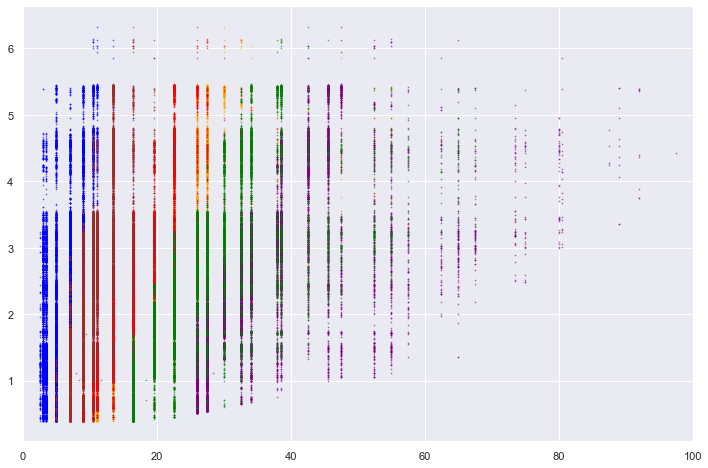

In [58]:
_ = plt.figure(figsize = (12, 8))
_ = plt.scatter(lyftsh['price'], lyftsh['distance'],  color = "blue", s = 0.5, alpha = 0.5)
_ = plt.scatter(lyftl['price'], lyftl['distance'], color = "orange", s = 0.5, alpha = 0.5)
_ = plt.scatter(lyftxl['price'], lyftxl['distance'], color = "red", s = 0.5, alpha = 0.5)
_ = plt.scatter(lyftbxl['price'], lyftbxl['distance'],  color = "purple", s = 0.5, alpha = 0.5)
_ = plt.scatter(lyftb['price'], lyftb['distance'], color = "green", s = 0.5, alpha = 0.5)
_ = plt.scatter(lyftr['price'], lyftr['distance'], color = "brown", s = 0.5, alpha = 0.5)
_ = plt.xlabel('')
_ = plt.xlim((0, 100))
_ = plt.show()

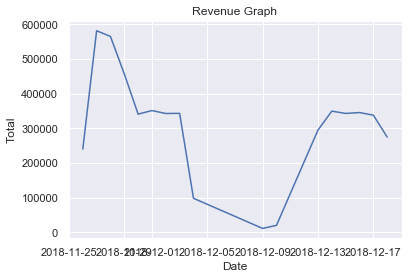

In [59]:
_ = plt.plot(lyft[['date', 'price']].groupby('date').sum())
_ = plt.xlabel('Date')
_ = plt.ylabel('Total')
_ = plt.title('Revenue Graph')

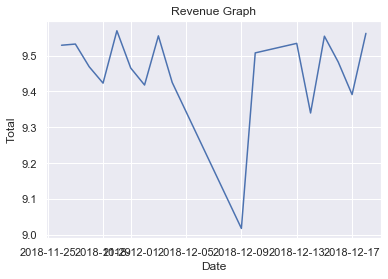

In [60]:
_ = plt.plot(lyft[['date', 'mile']].groupby('date').mean())
_ = plt.xlabel('Date')
_ = plt.ylabel('Total')
_ = plt.title('Revenue Graph')